In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("Data/SuicideDeathRates.csv")

In [3]:
df2 = df.loc[:, ["UNIT_NUM", "STUB_NAME", "STUB_NAME_NUM", "STUB_LABEL", "AGE_NUM", "YEAR", "ESTIMATE", "AGE"]]

age_num = [1, 2.1, 2.2, 3.1, 3.2, 4.1, 4.2, 5.1, 5.2, 6.0]
df2 = df2[(df2["UNIT_NUM"] == 2)&(df2["STUB_NAME"] == "Sex and age")&(df2["AGE_NUM"] != 5)&(df2["AGE_NUM"] != 4)&
            (df2["AGE_NUM"] != 3)&(df2["AGE_NUM"] != 2)&(df2["YEAR"] >= 2000)]

In [4]:
columns = df2["AGE"].unique().tolist()

In [5]:
df_male = df2[(df2["STUB_LABEL"].str[:4] == "Male")]
df_female = df2[(df2["STUB_LABEL"].str[:6] == "Female")]

In [6]:
data_male = {}
data_female = {}

for group in columns:
    data_male[group] = {}
    years = df_male["YEAR"][df_male["AGE"] == group].tolist()
    for year in years:
        data_male[group][year] = df_male.loc[(df_male["YEAR"] == year)&
                                             (df_male["AGE"] == group), "ESTIMATE"].values[0]
        
for group in columns:
    data_female[group] = {}
    years = df_female["YEAR"][df_female["AGE"] == group].tolist()
    for year in years:
        data_female[group][year] = df_female.loc[(df_female["YEAR"] == year)&
                                        (df_female["AGE"] == group), "ESTIMATE"].values[0]  

In [7]:
df_male_final = pd.DataFrame.from_dict(data_male)
df_female_final = pd.DataFrame.from_dict(data_female)

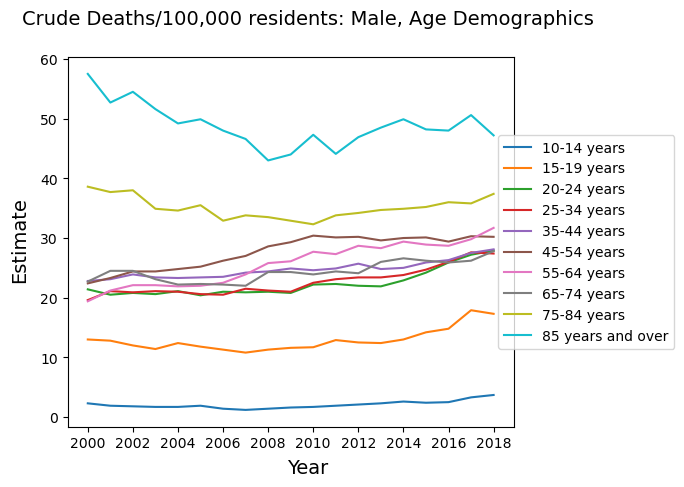

In [8]:
fig, ax = plt.subplots()
fig.suptitle("Crude Deaths/100,000 residents: Male, Age Demographics", fontsize = 14)
ax.plot(df_male_final, label = df_male_final.columns)
ax.locator_params(integer = True)
pos = ax.get_position()
ax.set_position([pos.x0, pos.y0, pos.width * 0.9, pos.height * 1])
ax.legend(loc = "center right", bbox_to_anchor = (1.375, 0.5))
ax.xaxis.set_ticks(range(2000, 2019, 2))
fig.text(0.5, 0.025, "Year", ha = "center", va = "center", fontsize = 14)
fig.text(0.05, 0.5, "Estimate", ha = "center", va = "center", rotation = "vertical", fontsize = 14)
plt.show()

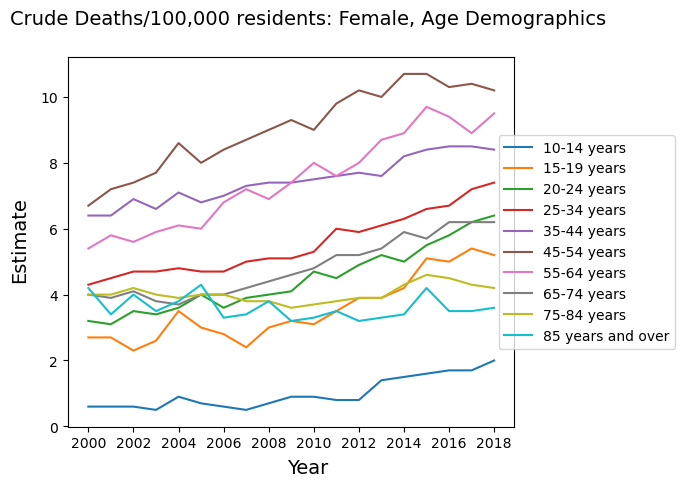

In [9]:
fig, ax = plt.subplots()
fig.suptitle("Crude Deaths/100,000 residents: Female, Age Demographics", fontsize = 14)
ax.plot(df_female_final, label = df_male_final.columns)
ax.locator_params(integer = True)
pos = ax.get_position()
ax.set_position([pos.x0, pos.y0, pos.width * 0.9, pos.height * 1])
ax.legend(loc = "center right", bbox_to_anchor = (1.375, 0.5))
ax.xaxis.set_ticks(range(2000, 2019, 2))
fig.text(0.5, 0.025, "Year", ha = "center", va = "center", fontsize = 14)
fig.text(0.05, 0.5, "Estimate", ha = "center", va = "center", rotation = "vertical", fontsize = 14)
plt.show()

In [10]:
percent_change_male = {}

for group in df_male_final.columns:
    x2 = df_male_final.at[2018, group]
    x1 = df_male_final.at[2000, group]
    percent_change_num = round((x2 - x1) / x1 * 100)
    percent_change_male[group] = percent_change_num

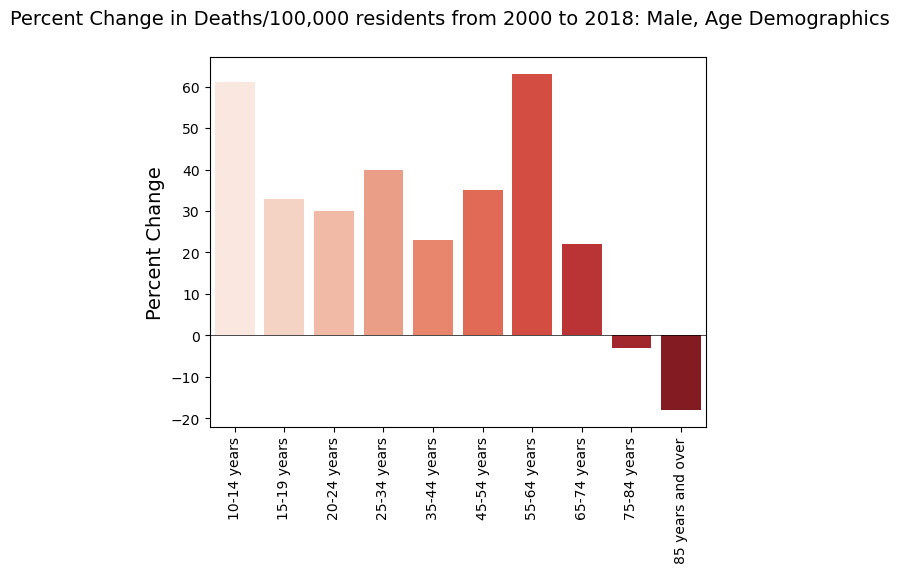

In [11]:
fig, ax1 = plt.subplots()
fig.suptitle("Percent Change in Deaths/100,000 residents from 2000 to 2018: Male, Age Demographics", fontsize = 14)
groups = list(percent_change_male.keys())
values = list(percent_change_male.values())
sns.barplot(ax = ax1, x = groups, y = values, dodge = False, palette = "Reds")
ax1.set_xticklabels(groups, rotation = 90)
ax1.set_ylabel("Percent Change", fontsize = 14)
plt.axhline(y = 0, color = "Black", linewidth = 0.5)
plt.show()

In [12]:
percent_change_female = {}

for group in df_female_final.columns:
    x2 = df_female_final.at[2018, group]
    x1 = df_female_final.at[2000, group]
    percent_change_num = round((x2 - x1) / x1 * 100)
    percent_change_female[group] = percent_change_num

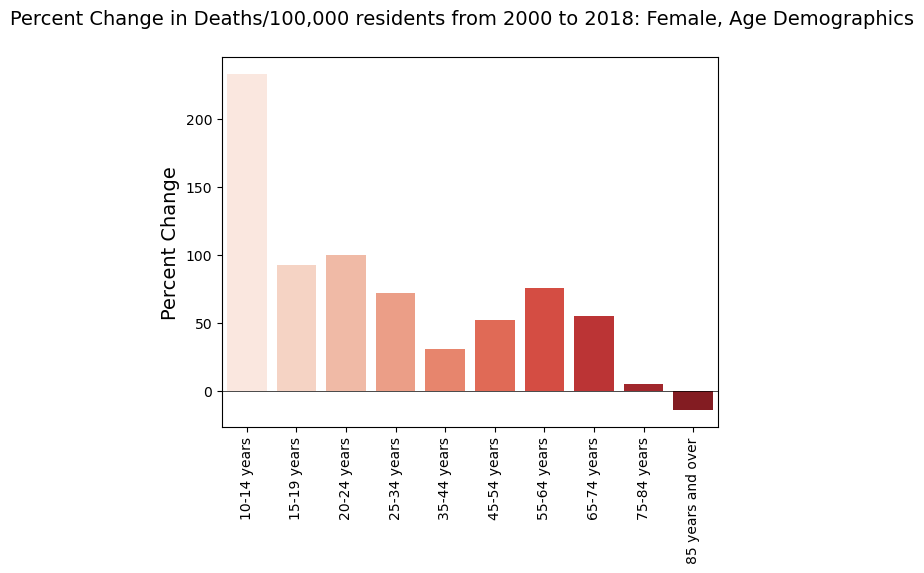

In [13]:
fig, ax1 = plt.subplots()
fig.suptitle("Percent Change in Deaths/100,000 residents from 2000 to 2018: Female, Age Demographics", fontsize = 14)
groups = list(percent_change_female.keys())
values = list(percent_change_female.values())
sns.barplot(ax = ax1, x = groups, y = values, dodge = False, palette = "Reds")
ax1.set_xticklabels(groups, rotation = 90)
ax1.set_ylabel("Percent Change", fontsize = 14)
plt.axhline(y = 0, color = "Black", linewidth = 0.5)
plt.show()

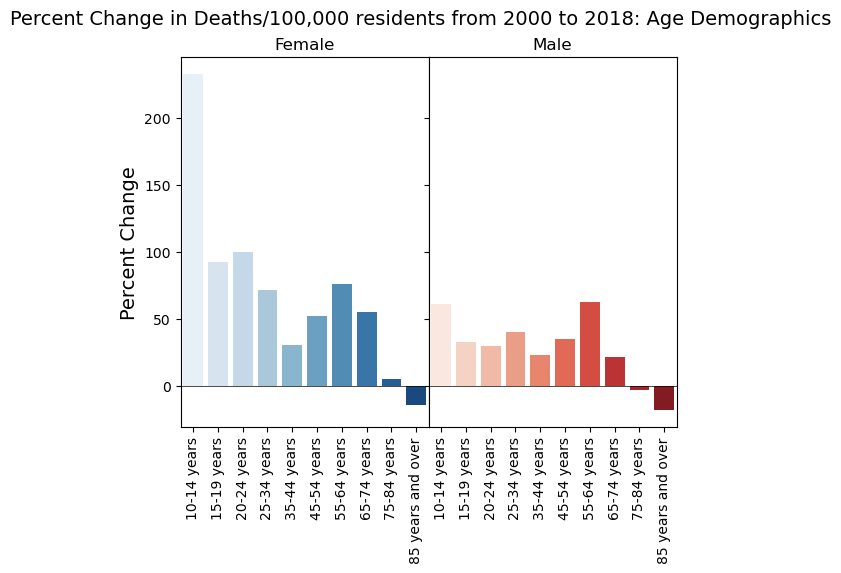

In [14]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharex = True, sharey = True)
fig.suptitle("Percent Change in Deaths/100,000 residents from 2000 to 2018: Age Demographics", fontsize = 14)
groups = list(percent_change_female.keys())
values = list(percent_change_female.values())
sns.barplot(ax = ax1, x = groups, y = values, dodge = False, palette = "Blues")
ax1.set_xticklabels(groups, rotation = 90)
ax1.set_ylabel("Percent Change", fontsize = 14)
ax1.axhline(y = 0, color = "Black", linewidth = 0.5)
groups = list(percent_change_male.keys())
values = list(percent_change_male.values())
sns.barplot(ax = ax2, x = groups, y = values, dodge = False, palette = "Reds")
ax2.set_xticklabels(groups, rotation = 90)
ax2.axhline(y = 0, color = "Black", linewidth = 0.5)
fig.subplots_adjust(wspace=0, hspace=0)
ax1.set_title("Female")
ax2.set_title("Male")
plt.show()